## Car Price Prediction

## Problem Statement

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model. This project contains two phase:-

#### 1)Data Collection : 
Where we have to scrape at least 5000 used cars data along with multiple features/ variables which may effect  the price.

#### 2)Model Building: 
After collecting the data, you need to build a machine learning model. Before model building do all 
data pre-processing steps. Try different models with different hyper parameters and select the best 
model.Follow the complete life cycle of data science:-

1. Data Cleaning

2. Exploratory Data Analysis

3. Data Pre-processing

4. Model Building

5. Model Evaluation

6. Selecting the best model




In [288]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### For the first part i have collected important data effecting used car prices. It contain details like:

Name

Varient

Year of purchase

History

Owner no

Distance Travel

Fule type

Insuarance Details ,etc which we'll discuss later in our model building.

## Exploring Data

In [289]:
#To print all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [290]:
#importing training data
df=pd.read_csv("Cars Details.csv")
df.head()

Unnamed: 0 Location                     Name                Varient  \
0           0    DELHI        2012 Maruti Swift             ZXI Manual   
1           1    DELHI     2014 Maruti Alto K10             VXI Manual   
2           2    DELHI   2015 Hyundai Grand i10  MAGNA 1.1 CRDI Manual   
3           3    DELHI  2014 Maruti Swift Dzire       VDI BS IV Manual   
4           4    DELHI        2015 Maruti Swift         VDI ABS Manual   

   PurchaseYr         History     Owners DrivenKm    Fule Recentservicing  \
0        2012  Non-Accidental  1st Owner  70,990   Petrol          70,990   
1        2014  Non-Accidental  1st Owner  40,562   Petrol          40,562   
2        2015  Non-Accidental  2nd Owner  62,491   Diesel          62,491   
3        2014  Non-Accidental  1st Owner  96,978   Diesel          96,978   
4        2015  Non-Accidental  1st Owner  44,638   Diesel          44,638   

  Transmission InsuaranceUpto       InsuType    Emi       PickupDt     Price  
0       MANUAL       Mar 2023      3rd Party  9,400  Tue, 29 March  4,07,199  
1       MANUAL       Nov 2022  Comprehensive  6,670  Tue, 29 March  2,87,299  
2       MANUAL       Mar 2023      3rd Party  7,239  Tue, 29 March  3,12,299  
3       MANUAL       Mar 2023      3rd Party  9,610  Tue, 29 March  4,16,399  
4       MANUAL       Mar 2023      3rd Party  9,976  Tue, 29 March  4,32,499

## EDA

In [291]:
#checking Shape dataset
df.shape

(5053, 16)

In [292]:
#Checking all column names of  dataset
df.columns

Index(['Unnamed: 0', 'Location', 'Name', 'Varient', 'PurchaseYr', 'History',
       'Owners', 'DrivenKm', 'Fule', 'Recentservicing', 'Transmission',
       'InsuaranceUpto', 'InsuType', 'Emi', 'PickupDt', 'Price'],
      dtype='object')

In [293]:
#Checking the data types of all columns in dataset
df.dtypes

Unnamed: 0          int64
Location           object
Name               object
Varient            object
PurchaseYr          int64
History            object
Owners             object
DrivenKm           object
Fule               object
Recentservicing    object
Transmission       object
InsuaranceUpto     object
InsuType           object
Emi                object
PickupDt           object
Price              object
dtype: object

In [294]:
#Checking the info about the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5053 entries, 0 to 5052
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5053 non-null   int64 
 1   Location         5052 non-null   object
 2   Name             5053 non-null   object
 3   Varient          5053 non-null   object
 4   PurchaseYr       5053 non-null   int64 
 5   History          5053 non-null   object
 6   Owners           5053 non-null   object
 7   DrivenKm         5053 non-null   object
 8   Fule             5053 non-null   object
 9   Recentservicing  5052 non-null   object
 10  Transmission     4993 non-null   object
 11  InsuaranceUpto   5053 non-null   object
 12  InsuType         5053 non-null   object
 13  Emi              5053 non-null   object
 14  PickupDt         5052 non-null   object
 15  Price            5053 non-null   object
dtypes: int64(2), object(14)
memory usage: 631.8+ KB


In [295]:
df.isnull().sum()

Unnamed: 0          0
Location            1
Name                0
Varient             0
PurchaseYr          0
History             0
Owners              0
DrivenKm            0
Fule                0
Recentservicing     1
Transmission       60
InsuaranceUpto      0
InsuType            0
Emi                 0
PickupDt            1
Price               0
dtype: int64

In [296]:
#Checking unique values of each column in our dataset
df.nunique()

Unnamed: 0         5053
Location             10
Name                458
Varient             619
PurchaseYr           15
History               1
Owners                4
DrivenKm           3485
Fule                  4
Recentservicing    3466
Transmission         21
InsuaranceUpto       43
InsuType             27
Emi                2655
PickupDt              3
Price              2655
dtype: int64

In [297]:
#Dropping unnecessary columns in our dataset
df = df.drop(["Unnamed: 0"],axis=1)
df = df.drop(["History"],axis=1)

In [298]:
# Checking our datset
df.head()

Location                     Name                Varient  PurchaseYr  \
0    DELHI        2012 Maruti Swift             ZXI Manual        2012   
1    DELHI     2014 Maruti Alto K10             VXI Manual        2014   
2    DELHI   2015 Hyundai Grand i10  MAGNA 1.1 CRDI Manual        2015   
3    DELHI  2014 Maruti Swift Dzire       VDI BS IV Manual        2014   
4    DELHI        2015 Maruti Swift         VDI ABS Manual        2015   

      Owners DrivenKm    Fule Recentservicing Transmission InsuaranceUpto  \
0  1st Owner  70,990   Petrol          70,990       MANUAL       Mar 2023   
1  1st Owner  40,562   Petrol          40,562       MANUAL       Nov 2022   
2  2nd Owner  62,491   Diesel          62,491       MANUAL       Mar 2023   
3  1st Owner  96,978   Diesel          96,978       MANUAL       Mar 2023   
4  1st Owner  44,638   Diesel          44,638       MANUAL       Mar 2023   

        InsuType    Emi       PickupDt     Price  
0      3rd Party  9,400  Tue, 29 March  4,07,199  
1  Comprehensive  6,670  Tue, 29 March  2,87,299  
2      3rd Party  7,239  Tue, 29 March  3,12,299  
3      3rd Party  9,610  Tue, 29 March  4,16,399  
4      3rd Party  9,976  Tue, 29 March  4,32,499

In [299]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in our dataset.
for i in df.columns:
        print(df[i].value_counts())
        print('-----------*----------*----------*---------')

NOIDA        793
DELHI        774
GURGAON      722
CHENNAI      657
PUNE         597
BENGALURU    436
AHMEDABAD    385
KOLKATA      284
MUMBAI       279
HYDERABAD    125
Name: Location, dtype: int64
-----------*----------*----------*---------
2014 Maruti Swift               131
2013 Maruti Swift               109
2015 Maruti Swift               102
2017 Hyundai Grand i10           94
2016 Maruti Baleno               89
2018 Ford Ecosport               84
2017 Maruti Baleno               79
2016 Maruti Vitara Brezza        69
2016 Hyundai Grand i10           67
2015 Hyundai Grand i10           67
2015 Hyundai Elite i20           65
2018 Maruti Baleno               60
2018 Maruti Vitara Brezza        58
2017 Maruti Swift                56
2016 Ford Ecosport               56
2014 Ford Ecosport               54
2016 Hyundai Elite i20           51
2018 Maruti Alto 800             46
2017 Hyundai Elite i20           46
2017 Maruti Vitara Brezza        45
2019 Maruti Vitara Brezza        45
2

In [300]:
# Checking Duplcate rows
df.duplicated().sum()

1

In [301]:
#Dropping unnecessary columns in our dataset
df = df.drop(["PickupDt"],axis=1)

In [302]:
# Lets check our dataset 
df.head()

Location                     Name                Varient  PurchaseYr  \
0    DELHI        2012 Maruti Swift             ZXI Manual        2012   
1    DELHI     2014 Maruti Alto K10             VXI Manual        2014   
2    DELHI   2015 Hyundai Grand i10  MAGNA 1.1 CRDI Manual        2015   
3    DELHI  2014 Maruti Swift Dzire       VDI BS IV Manual        2014   
4    DELHI        2015 Maruti Swift         VDI ABS Manual        2015   

      Owners DrivenKm    Fule Recentservicing Transmission InsuaranceUpto  \
0  1st Owner  70,990   Petrol          70,990       MANUAL       Mar 2023   
1  1st Owner  40,562   Petrol          40,562       MANUAL       Nov 2022   
2  2nd Owner  62,491   Diesel          62,491       MANUAL       Mar 2023   
3  1st Owner  96,978   Diesel          96,978       MANUAL       Mar 2023   
4  1st Owner  44,638   Diesel          44,638       MANUAL       Mar 2023   

        InsuType    Emi     Price  
0      3rd Party  9,400  4,07,199  
1  Comprehensive  6,670  2,87,299  
2      3rd Party  7,239  3,12,299  
3      3rd Party  9,610  4,16,399  
4      3rd Party  9,976  4,32,499

### Feature Engineering

In [303]:
# Converting years column to age column in our dataset
df['year old'] = df['PurchaseYr'].max() - df['PurchaseYr']


# Dropping old columns in dataset
df.drop(['PurchaseYr'], axis=1, inplace = True)

In [304]:
df.head()

Location                     Name                Varient     Owners  \
0    DELHI        2012 Maruti Swift             ZXI Manual  1st Owner   
1    DELHI     2014 Maruti Alto K10             VXI Manual  1st Owner   
2    DELHI   2015 Hyundai Grand i10  MAGNA 1.1 CRDI Manual  2nd Owner   
3    DELHI  2014 Maruti Swift Dzire       VDI BS IV Manual  1st Owner   
4    DELHI        2015 Maruti Swift         VDI ABS Manual  1st Owner   

  DrivenKm    Fule Recentservicing Transmission InsuaranceUpto       InsuType  \
0  70,990   Petrol          70,990       MANUAL       Mar 2023      3rd Party   
1  40,562   Petrol          40,562       MANUAL       Nov 2022  Comprehensive   
2  62,491   Diesel          62,491       MANUAL       Mar 2023      3rd Party   
3  96,978   Diesel          96,978       MANUAL       Mar 2023      3rd Party   
4  44,638   Diesel          44,638       MANUAL       Mar 2023      3rd Party   

     Emi     Price  year old  
0  9,400  4,07,199         9  
1  6,670  2,87,299         7  
2  7,239  3,12,299         6  
3  9,610  4,16,399         7  
4  9,976  4,32,499         6

In [305]:
df['Transmission'].value_counts()

MANUAL          4279
AUTOMATIC        688
UP-16-x-xxxx       3
TN-19-x-xxxx       2
TN-11-x-xxxx       2
HR-26-x-xxxx       2
HR-29-x-xxxx       2
TN-09-x-xxxx       2
WB-34-x-xxxx       1
WB-20-x-xxxx       1
TN-01-x-xxxx       1
TN-12-x-xxxx       1
MH-14-x-xxxx       1
TN-87-x-xxxx       1
WB-06-x-xxxx       1
MH-04-x-xxxx       1
TN-02-x-xxxx       1
MH-02-x-xxxx       1
WB-10-x-xxxx       1
MH-47-x-xxxx       1
MH-03-x-xxxx       1
Name: Transmission, dtype: int64

In [306]:
# As we can see it had extracted some registration no so we'll replace them with column mode
df['Transmission'].mode()

0    MANUAL
dtype: object

In [307]:
# As we saw manual is the mode so we'll replace them with Manual

df['Transmission']=df['Transmission'].replace({'UP-16-x-xxxx':'MANUAL','TN-19-x-xxxx':'MANUAL','MH-47-x-xxxx':'MANUAL','WB-10-x-xxxx':'MANUAL','MH-02-x-xxxx':'MANUAL','TN-02-x-xxxx':'MANUAL','MH-04-x-xxxx':'MANUAL','MH-03-x-xxxx':'MANUAL'})
# As we saw manual is the mode so we'll replace them with Manual

df['Transmission']=df['Transmission'].replace({'WB-06-x-xxxx':'MANUAL','MH-14-x-xxxx':'MANUAL','MH-14-x-xxxx':'MANUAL','TN-87-x-xxxx':'MANUAL','TN-12-x-xxxx':'MANUAL','TN-01-x-xxxx':'MANUAL','WB-20-x-xxxx':'MANUAL','WB-20-x-xxxx':'MANUAL'})
df['Transmission']=df['Transmission'].replace({'HR-26-x-xxxx':'MANUAL','TN-09-x-xxxx ':'MANUAL','HR-29-x-xxxx':'MANUAL','TN-11-x-xxxx':'MANUAL','WB-34-x-xxxx':'MANUAL','TN-09-x-xxxx':'MANUAL'})

In [308]:
df['Transmission'].value_counts()

MANUAL       4305
AUTOMATIC     688
Name: Transmission, dtype: int64

In [309]:
df['Recentservicing'].value_counts()

MANUAL       22
47,594        6
42,231        6
40,062        4
29,618        4
25,636        4
72,378        4
24,984        4
49,783        4
29,026        4
27,517        4
43,310        4
30,248        4
81,387        4
11,839        4
67,254        4
30,867        3
24,546        3
37,628        3
67,725        3
74,447        3
35,502        3
10,397        3
50,483        3
66,350        3
45,371        3
93,428        3
17,133        3
44,604        3
83,216        3
51,646        3
1,05,088      3
84,904        3
24,778        3
53,634        3
24,487        3
67,331        3
44,162        3
38,160        3
12,551        3
13,258        3
40,409        3
51,995        3
86,636        3
77,856        3
54,011        3
1,22,416      3
40,547        3
70,981        3
76,264        3
83,787        3
88,817        3
46,477        3
1,60,555      3
84,265        3
40,820        3
82,096        3
53,610        3
23,801        3
91,367        3
99,493        3
1,03,619      3
74,036  

In [310]:
# Recentservicing Also contain entry of manual which is'nt  right so we'll replace it with next max occurance
df['Recentservicing']=df['Recentservicing'].replace({'MANUAL':'47,594','AUTOMATIC':'42231'})

In [311]:
df['Recentservicing'].value_counts()

47,594      28
42,231       6
40,062       4
29,618       4
25,636       4
72,378       4
24,984       4
49,783       4
29,026       4
27,517       4
43,310       4
30,248       4
81,387       4
67,254       4
11,839       4
51,995       3
37,628       3
67,725       3
74,447       3
10,397       3
35,502       3
50,483       3
45,371       3
66,350       3
17,133       3
93,428       3
44,604       3
83,216       3
40,409       3
51,646       3
1,05,088     3
24,778       3
84,904       3
53,634       3
24,487       3
67,331       3
44,162       3
38,160       3
12,551       3
58,123       3
13,258       3
24,546       3
30,867       3
53,610       3
40,820       3
86,636       3
82,096       3
54,011       3
40,547       3
70,981       3
76,264       3
83,787       3
88,817       3
46,477       3
1,60,555     3
84,265       3
77,856       3
1,22,416     3
23,801       3
91,367       3
99,493       3
1,03,619     3
74,036       3
22,443       3
97,814       3
36,710       3
1,59,012  

In [312]:
df['Fule'].value_counts()

Petrol          3150
Diesel          1884
Petrol + CNG      18
Petrol + LPG       1
Name: Fule, dtype: int64

In [313]:
# As its clear that most of the fule type is petrol so we will convert other (Petrol + CNG & Petrol + LPG ) to petrol
df['Fule']=df['Fule'].replace({'Petrol + CNG':'Petrol','Petrol + LPG':'Petrol'})

In [314]:
df['Fule'].value_counts()

Petrol    3169
Diesel    1884
Name: Fule, dtype: int64

In [315]:
df['InsuType'].value_counts()

3rd Party            3812
Comprehensive         597
Zero Depreciation     249
Comp                  196
Zero_Dep               81
Third_party            79
Third Party            13
December 2012           3
November 2013           2
March 2015              2
July 2016               2
August 2018             2
July 2018               1
May 2016                1
July 2017               1
January 2019            1
April 2019              1
March 2018              1
January 2018            1
May 2018                1
February 2018           1
November 2018           1
March 2017              1
August 2015             1
June 2017               1
July 2015               1
June 2019               1
Name: InsuType, dtype: int64

In [316]:
# As we can see insuarance type column has extracted some wrong details so we'll replace them with column mode
df['InsuType'].mode()

0    3rd Party
dtype: object

In [317]:
# Replacing with 3rd Party
df['InsuType']=df['InsuType'].replace({'Third_party':'3rd Party','Third Party':'3rd Party','December 2012':'3rd Party','November 2013':'3rd Party','March 2015':'3rd Party','July 2016':'3rd Party','August 2018':'3rd Party','July 2018':'3rd Party','May 2016':'3rd Party','May 2016':'3rd Party','July 2017':'3rd Party','January 2019':'3rd Party','April 2019':'3rd Party','March 2018':'3rd Party','January 2018':'3rd Party','May 2018':'3rd Party','February 2018':'3rd Party','November 2018':'3rd Party','March 2017':'3rd Party','August 2015':'3rd Party','June 2017':'3rd Party','July 2015':'3rd Party','June 2019 ':'3rd Party','Zero_Dep':'Zero Depreciation','Comp':'Comprehensive'})

In [318]:
df['InsuType']=df['InsuType'].replace({'3rd Party':'Third Party'})

In [319]:
df['InsuType'].value_counts()

Third Party          3929
Comprehensive         793
Zero Depreciation     330
June 2019               1
Name: InsuType, dtype: int64

In [320]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in our dataset.
for i in df.columns:
        print(df[i].value_counts())
        print('-----------*----------*----------*---------')

NOIDA        793
DELHI        774
GURGAON      722
CHENNAI      657
PUNE         597
BENGALURU    436
AHMEDABAD    385
KOLKATA      284
MUMBAI       279
HYDERABAD    125
Name: Location, dtype: int64
-----------*----------*----------*---------
2014 Maruti Swift               131
2013 Maruti Swift               109
2015 Maruti Swift               102
2017 Hyundai Grand i10           94
2016 Maruti Baleno               89
2018 Ford Ecosport               84
2017 Maruti Baleno               79
2016 Maruti Vitara Brezza        69
2016 Hyundai Grand i10           67
2015 Hyundai Grand i10           67
2015 Hyundai Elite i20           65
2018 Maruti Baleno               60
2018 Maruti Vitara Brezza        58
2017 Maruti Swift                56
2016 Ford Ecosport               56
2014 Ford Ecosport               54
2016 Hyundai Elite i20           51
2018 Maruti Alto 800             46
2017 Hyundai Elite i20           46
2017 Maruti Vitara Brezza        45
2019 Maruti Vitara Brezza        45
2

In [321]:
df.isnull().sum()

Location            1
Name                0
Varient             0
Owners              0
DrivenKm            0
Fule                0
Recentservicing     1
Transmission       60
InsuaranceUpto      0
InsuType            0
Emi                 0
Price               0
year old            0
dtype: int64

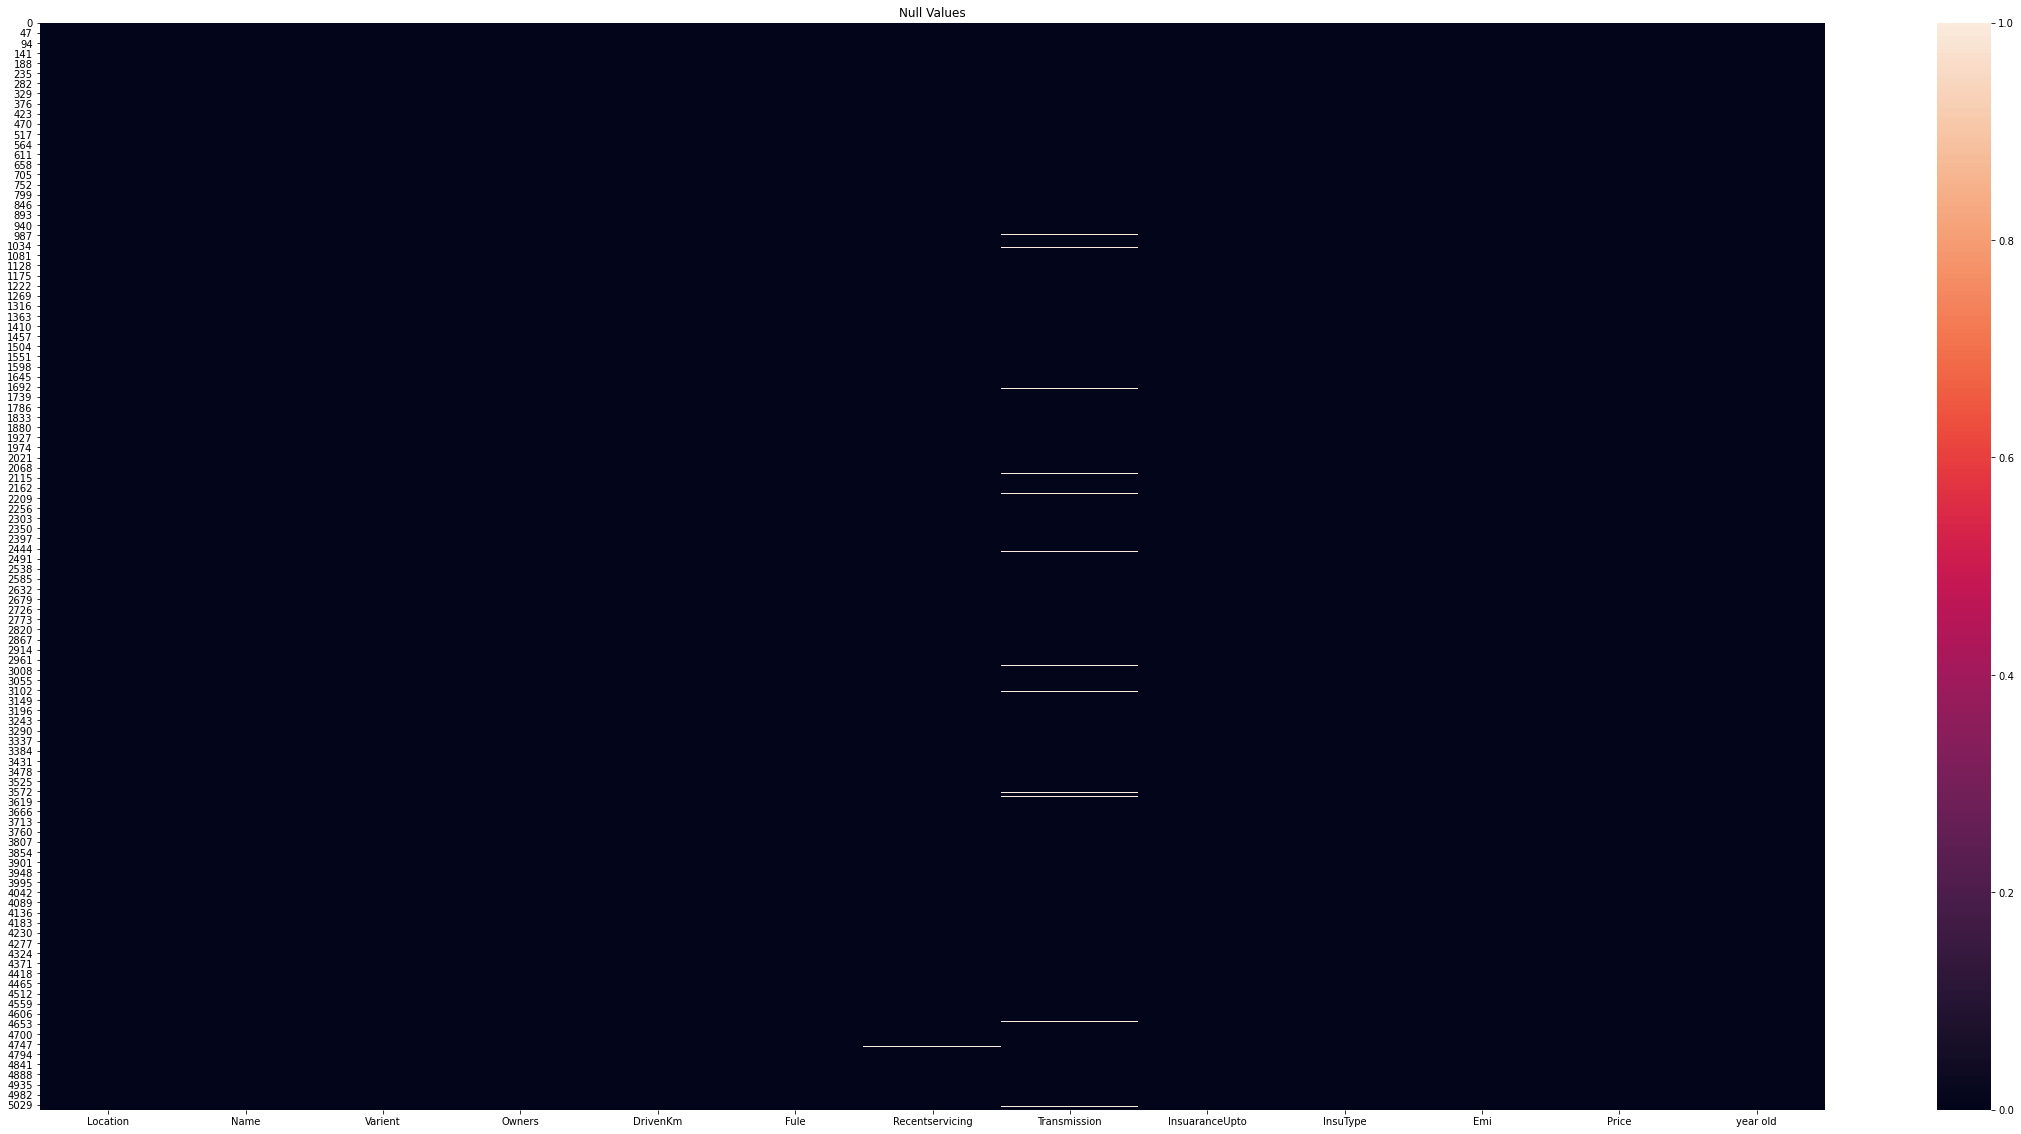

In [322]:
#Visualizeing null values again after imputation in train dataset
plt.figure(figsize=[40,20])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [323]:
#Checking for empty observations in target column
df.loc[df['Transmission'] == ""]

Empty DataFrame
Columns: [Location, Name, Varient, Owners, DrivenKm, Fule, Recentservicing, Transmission, InsuaranceUpto, InsuType, Emi, Price, year old]
Index: []

As there are very few null value i'll drop them.

In [324]:
df.dropna( axis=0, inplace=True)

In [325]:
df.isnull().sum()

Location           0
Name               0
Varient            0
Owners             0
DrivenKm           0
Fule               0
Recentservicing    0
Transmission       0
InsuaranceUpto     0
InsuType           0
Emi                0
Price              0
year old           0
dtype: int64

In [326]:
# Lets check the shape again
df.shape

(4991, 13)

## Data Visualization

In [327]:
# checking for categorical and numeric column columns in train dataset
categorical_columns=[]
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
        
print("Categorical=",categorical_columns)
print("Numerical=",numerical_columns)

Categorical= ['Location', 'Name', 'Varient', 'Owners', 'DrivenKm', 'Fule', 'Recentservicing', 'Transmission', 'InsuaranceUpto', 'InsuType', 'Emi', 'Price']
Numerical= ['year old']


In [328]:
df.dtypes

Location           object
Name               object
Varient            object
Owners             object
DrivenKm           object
Fule               object
Recentservicing    object
Transmission       object
InsuaranceUpto     object
InsuType           object
Emi                object
Price              object
year old            int64
dtype: object

In [329]:
#converting contineous data to int
df['Emi']=df['Emi'].str.replace(",","")

In [330]:
#converting contineous data to int

df['DrivenKm']=df['DrivenKm'].str.replace(",","")
df['Recentservicing']=df['Recentservicing'].str.replace(",","")
df['Price']=df['Price'].str.replace(",","")

In [331]:
df.head()

Location                     Name                Varient     Owners  \
0    DELHI        2012 Maruti Swift             ZXI Manual  1st Owner   
1    DELHI     2014 Maruti Alto K10             VXI Manual  1st Owner   
2    DELHI   2015 Hyundai Grand i10  MAGNA 1.1 CRDI Manual  2nd Owner   
3    DELHI  2014 Maruti Swift Dzire       VDI BS IV Manual  1st Owner   
4    DELHI        2015 Maruti Swift         VDI ABS Manual  1st Owner   

  DrivenKm    Fule Recentservicing Transmission InsuaranceUpto       InsuType  \
0   70990   Petrol           70990       MANUAL       Mar 2023    Third Party   
1   40562   Petrol           40562       MANUAL       Nov 2022  Comprehensive   
2   62491   Diesel           62491       MANUAL       Mar 2023    Third Party   
3   96978   Diesel           96978       MANUAL       Mar 2023    Third Party   
4   44638   Diesel           44638       MANUAL       Mar 2023    Third Party   

    Emi   Price  year old  
0  9400  407199         9  
1  6670  287299         7  
2  7239  312299         6  
3  9610  416399         7  
4  9976  432499         6

In [332]:
# Converting to contineous data to integer
df['Emi']=df['Emi'].astype(int)
df['DrivenKm']=df['DrivenKm'].astype(int)
df['Price']=df['Price'].astype(int)
df['Recentservicing']=df['Recentservicing'].astype(int)

In [333]:
df.dtypes

Location           object
Name               object
Varient            object
Owners             object
DrivenKm            int32
Fule               object
Recentservicing     int32
Transmission       object
InsuaranceUpto     object
InsuType           object
Emi                 int32
Price               int32
year old            int64
dtype: object

In [334]:
# checking for categorical and numeric column columns in our dataset
categorical_columns=[]
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
        
print("Categorical=",categorical_columns)
print("Numerical=",numerical_columns)

Categorical= ['Location', 'Name', 'Varient', 'Owners', 'Fule', 'Transmission', 'InsuaranceUpto', 'InsuType']
Numerical= ['DrivenKm', 'Recentservicing', 'Emi', 'Price', 'year old']


### Univariate analysis for numerical columns:

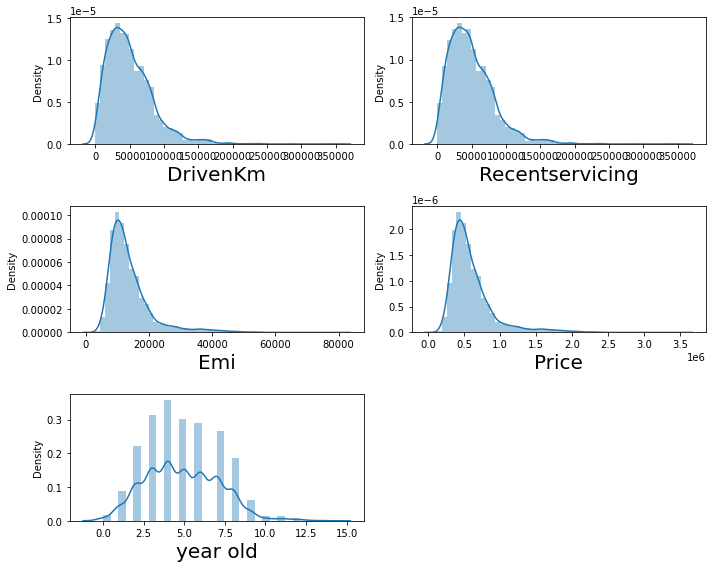

In [335]:
#Distribution plot for all numerical columns
plt.figure(figsize = (10,8))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=7:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

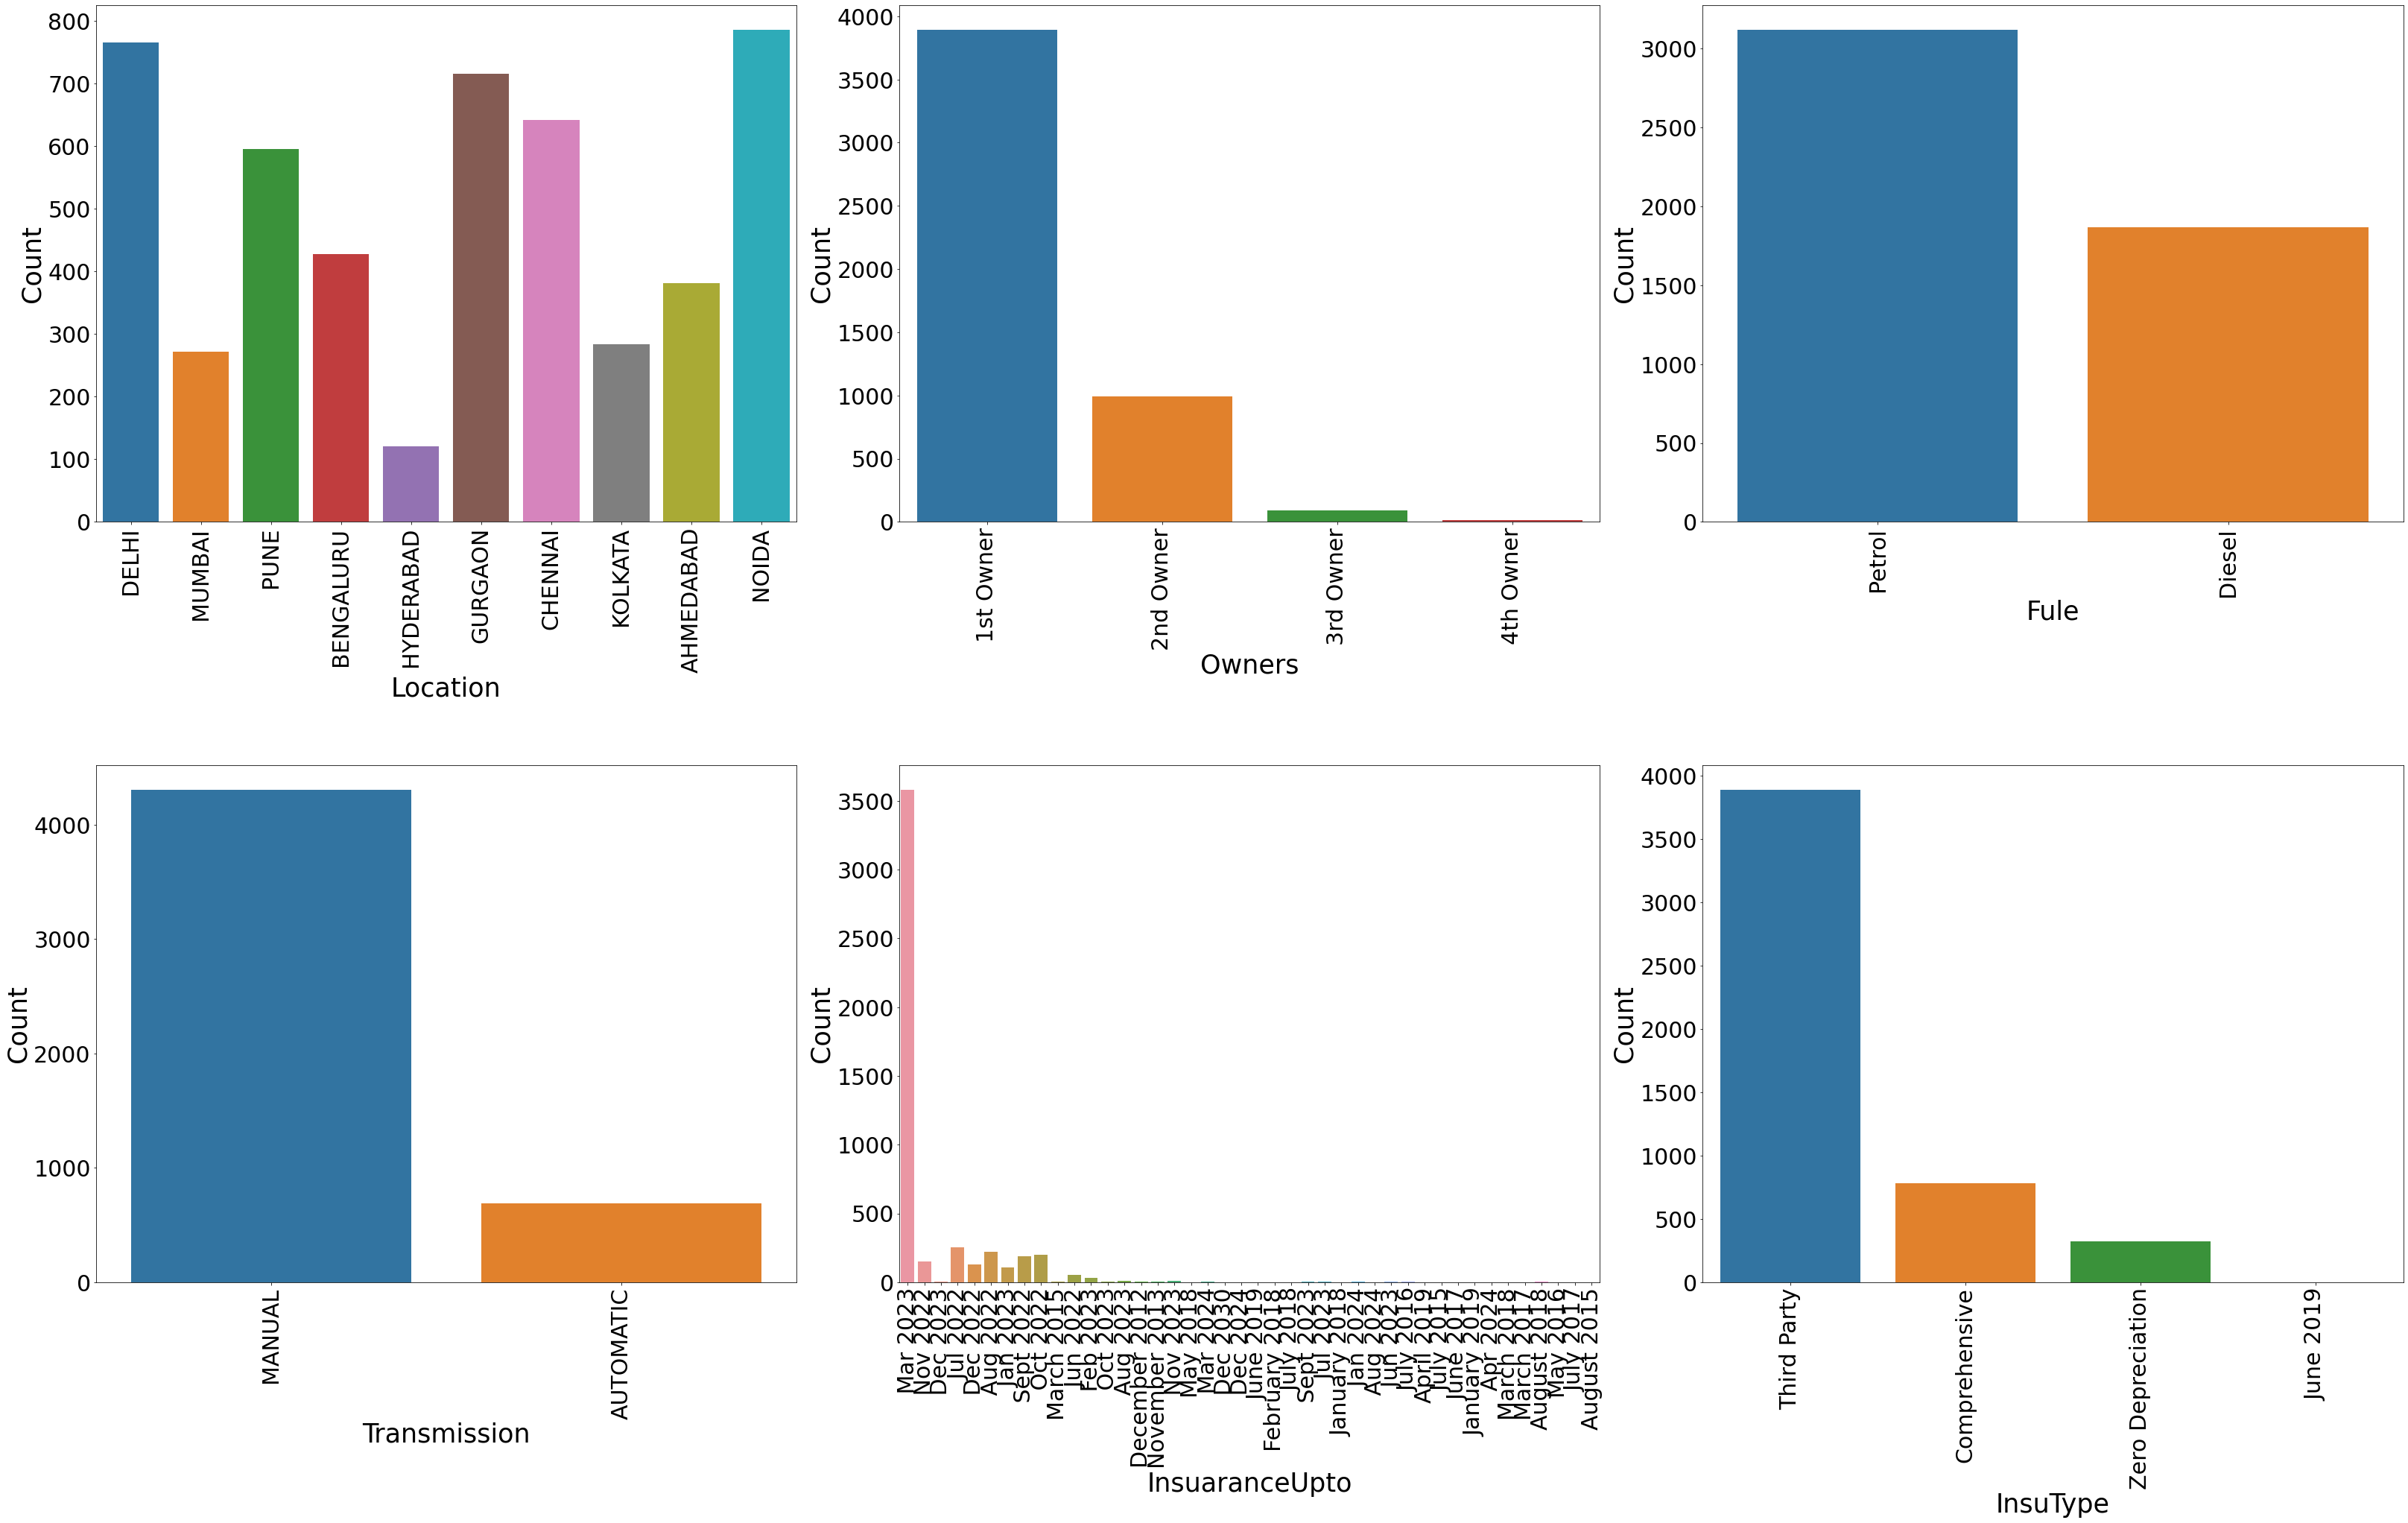

In [336]:
# For categorical column
Categorical= ['Location', 'Owners', 'Fule', 'Transmission', 'InsuaranceUpto', 'InsuType']
#Bar plot for all categorical columns
plt.figure(figsize = (45,180))
plotnumber = 1
for column in df[Categorical]:
    if plotnumber <=40:
        ax = plt.subplot(13,3,plotnumber)
        sns.countplot(df[column])
        plt.xticks(rotation=90,fontsize = 30)
        plt.yticks(rotation=0,fontsize = 30)
        plt.xlabel(column,fontsize = 35)
        plt.ylabel('Count',fontsize = 35)
    plotnumber+=1
plt.tight_layout()

### Observation

1 Noida have maximum no of used car on sale.

2 Most of the car falls into category '1st owner' i.e single user before selling.

3 Car with Petrol as Fule Type are more in numbers , which indicates that maybe customer usually prefer petrol car.

4 Most of the car which are on sale are Mannualy operated one ,automatic car are usually expensive.

5 Most of the car have been insuared upto march 2023 

6 Most No. of car have 3rd party insuarance.

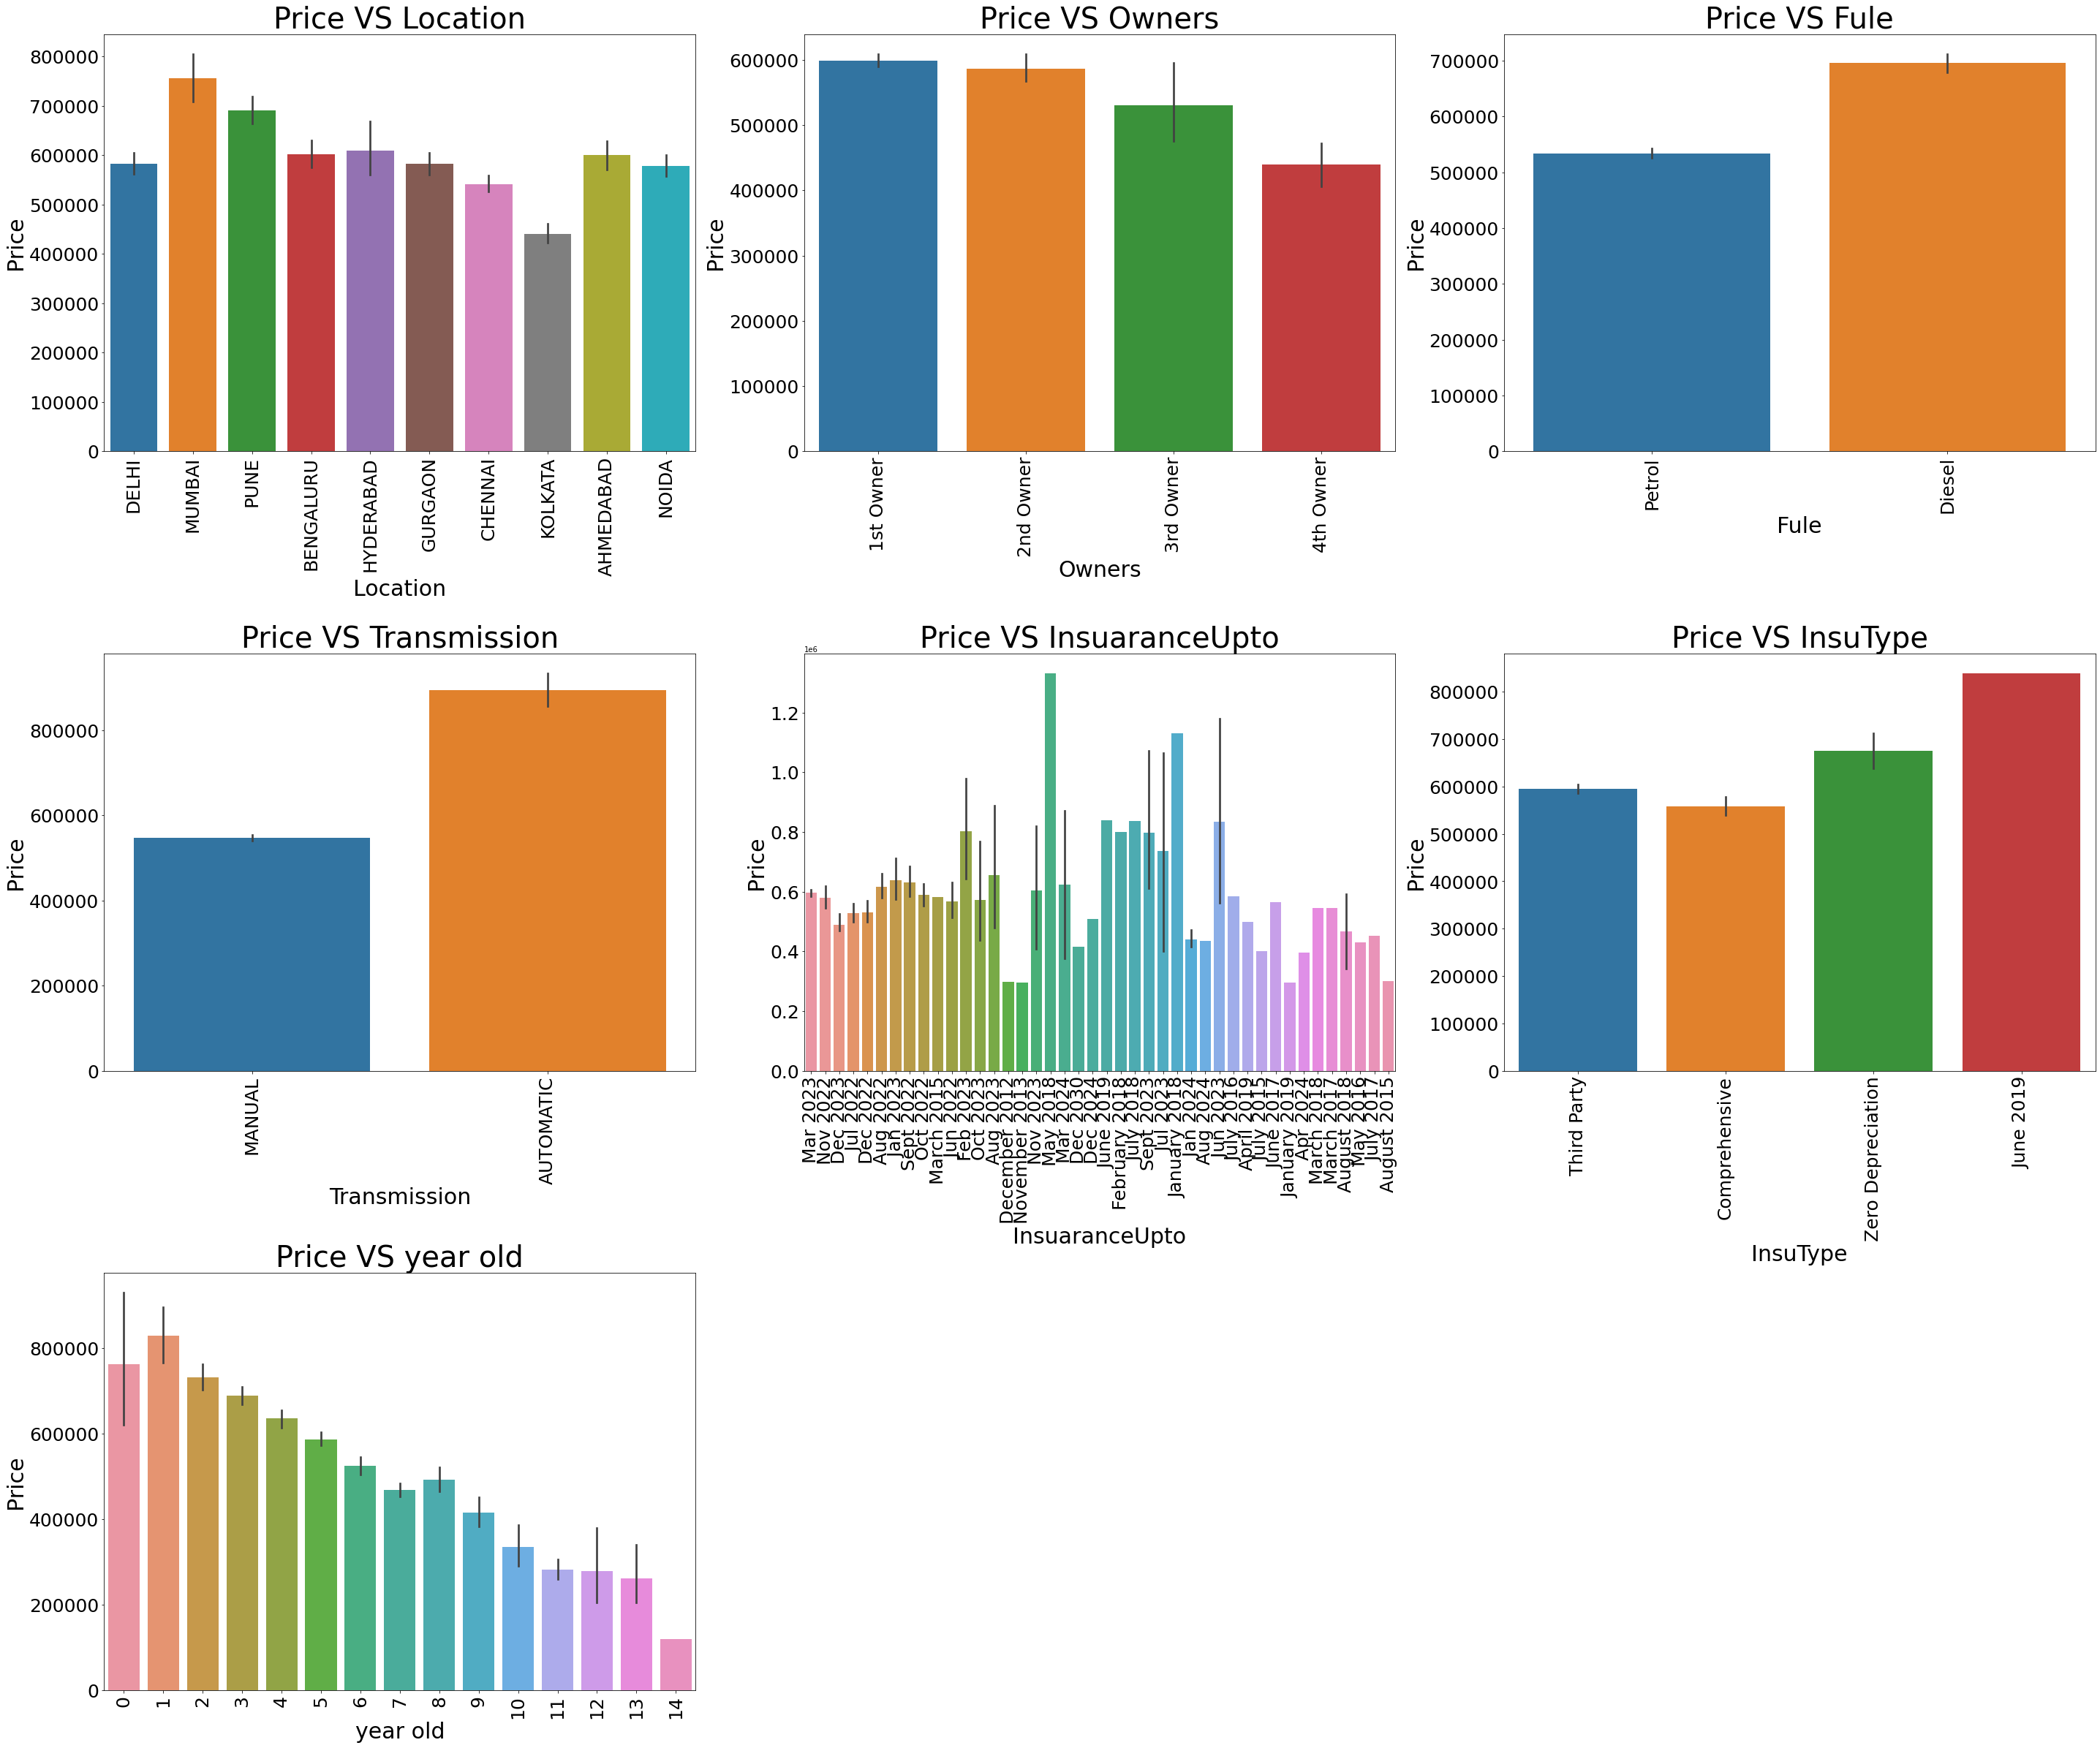

In [337]:
h=['Location','Owners', 'Fule', 'Transmission', 'InsuaranceUpto', 'InsuType','year old']
#Bar plot for all categorical columns
plt.figure(figsize=(40,150))
for i in range(len(h)):
    plt.subplot(13,3,i+1)
    sns.barplot(y=df['Price'],x=df[h[i]])
    plt.title(f"Price VS {h[i]}",fontsize=40)
    plt.xticks(rotation=90,fontsize=25)  
    plt.yticks(rotation=0,fontsize=25)
    plt.xlabel(h[i],fontsize = 30)
    plt.ylabel('Price',fontsize = 30)
    plt.tight_layout()

#### Observation

1 Cars manufactured in mumbai have higher price then other, whereas in kolkata price is cheapest.

2 Car who have 1st or 2nd owner have higher price as they are well maintained.

3 Car having fule type as diesel have higher price.

4 Automatic cars are costlier than other.

5 Cars which have been insuared upto May 2018 have higher price.

6 Cars having insuarance type as "Zero Depriciation" have higher price.

7 New cars have higher Price.

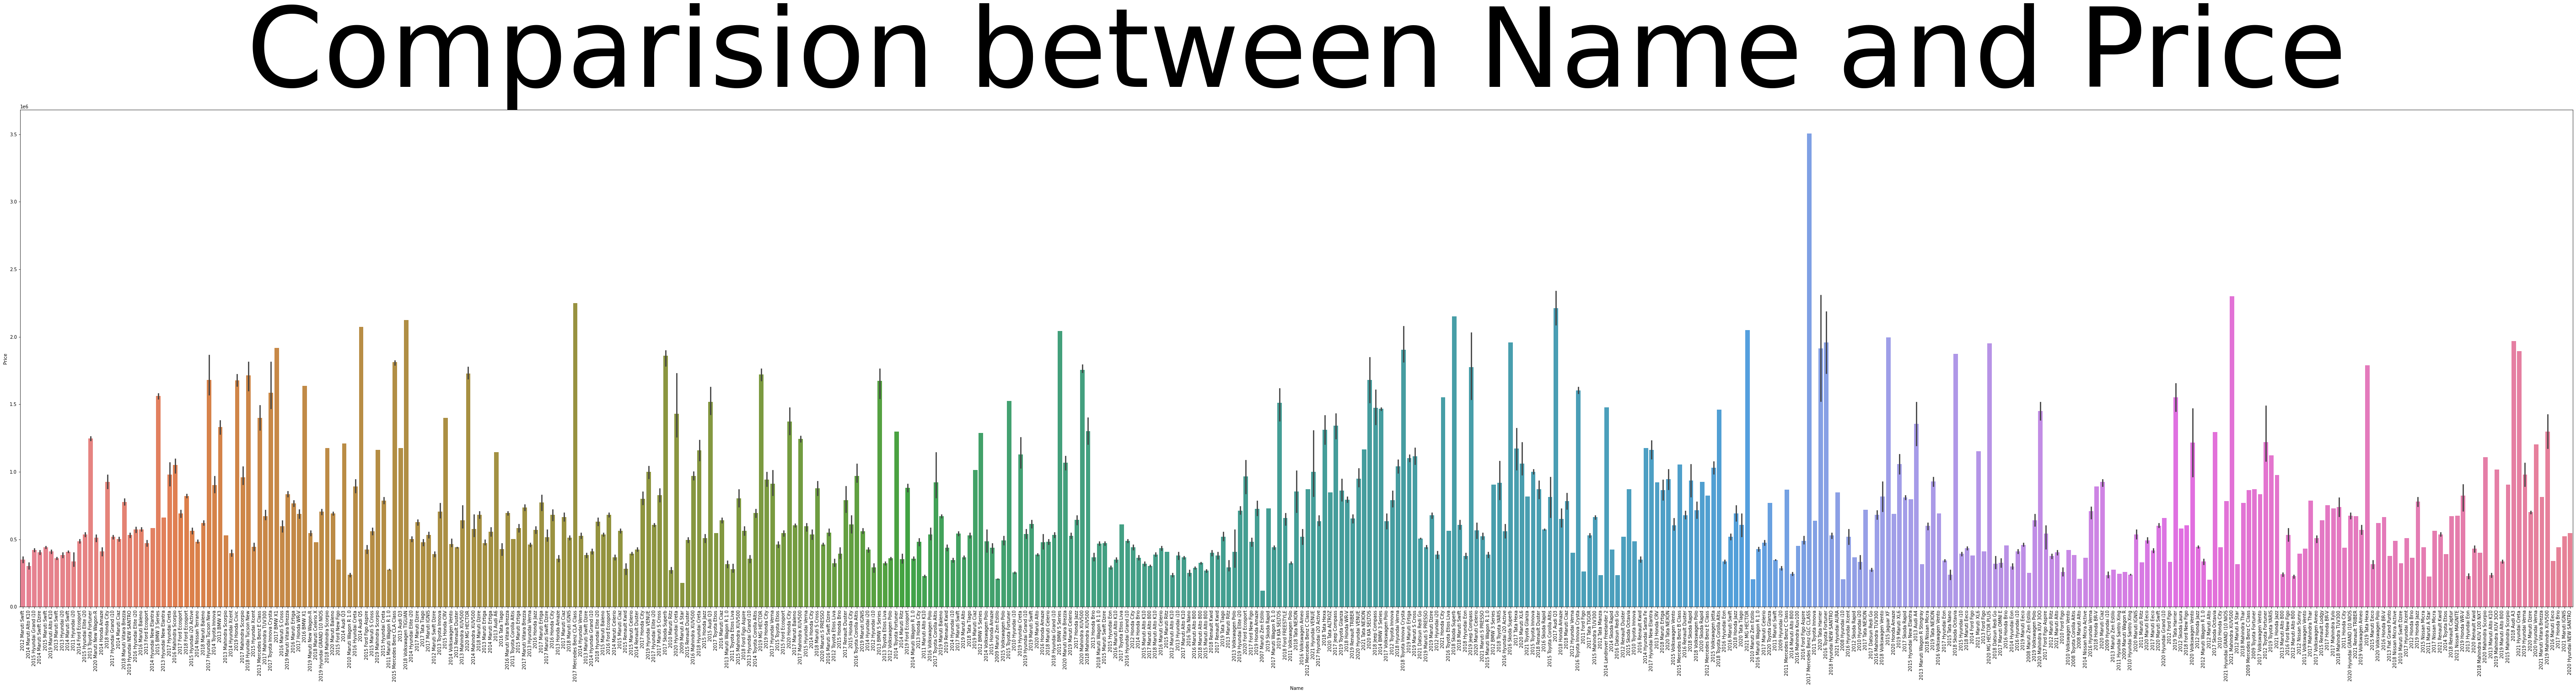

In [338]:
#Comparision between features using box plot
plt.figure(figsize=[100,20])
plt.title('Comparision between Name and Price',fontsize=240)
sns.barplot(df['Name'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

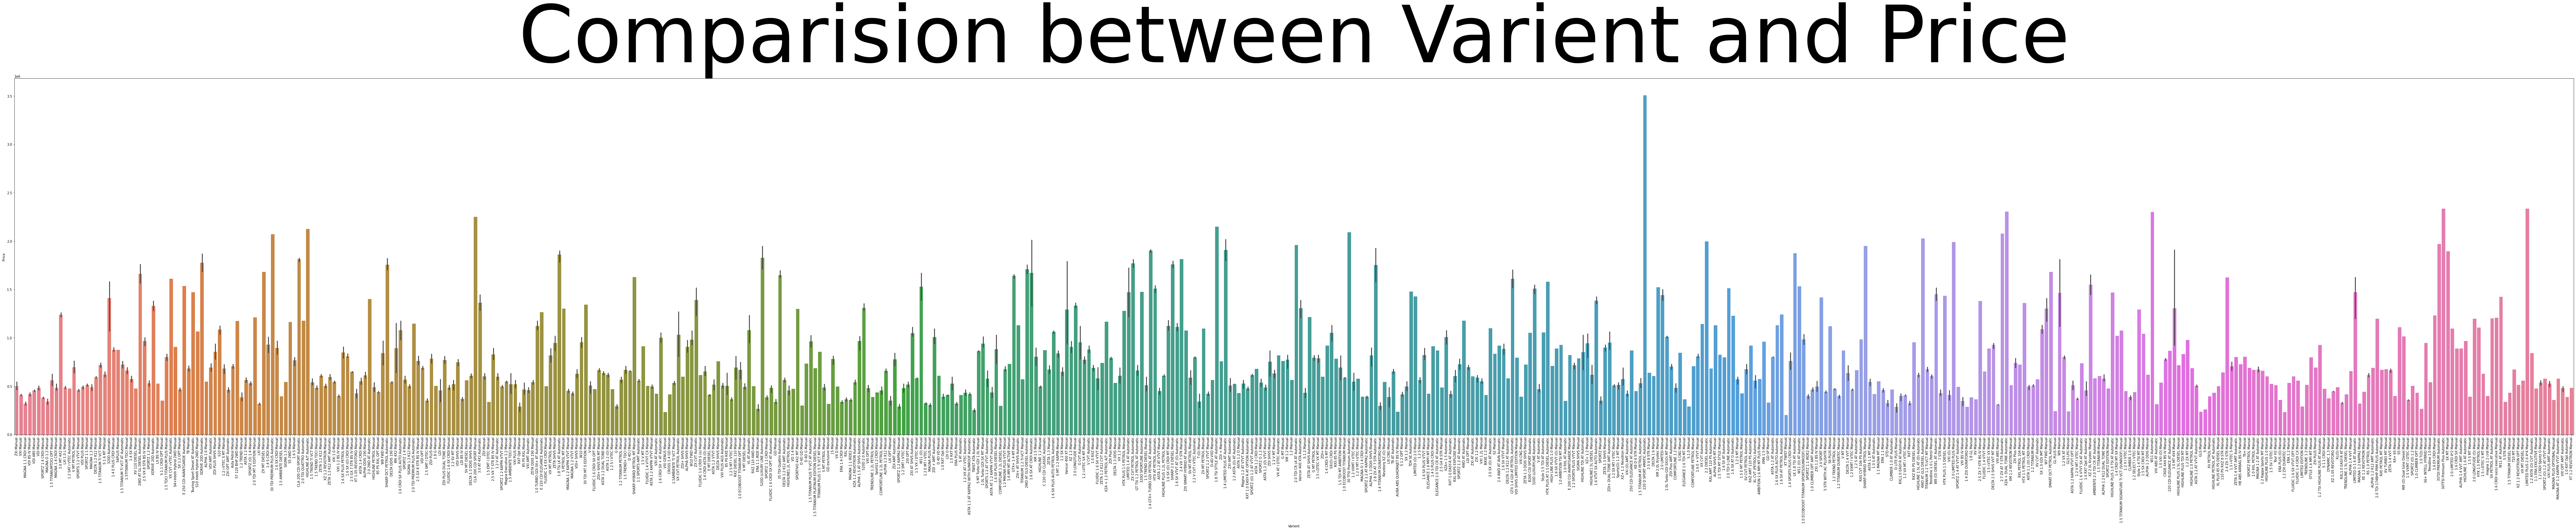

In [339]:
#Comparision between features using box plot
plt.figure(figsize=[140,20])
plt.title('Comparision between Varient and Price',fontsize=240)
sns.barplot(df['Varient'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

### Bivariate visualization

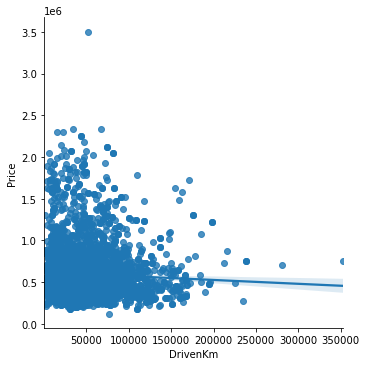

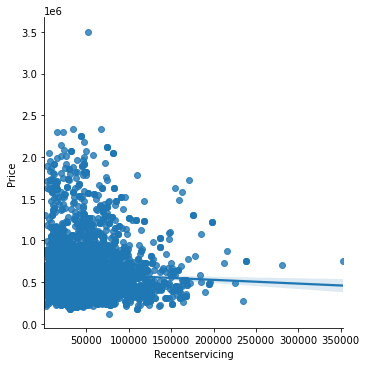

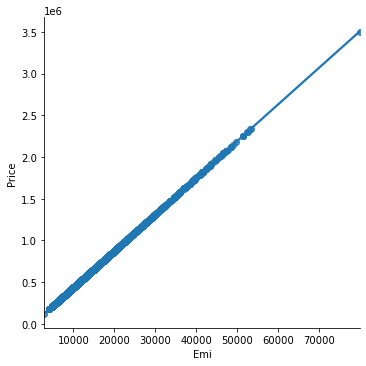

In [341]:
x_list = ['DrivenKm', 'Recentservicing', 'Emi']
for x in x_list:
    sns.lmplot(x=x, y='Price',data=df)
    plt.show()

#### Observation
 
1  Kilometers Driven is affecting the price as it has a slightly Negative slope, which indicate more driven car have lower price.

2 Car which have underwent servicing at lower milometer readings have higher price

3 Higher the Emi ,higher the price of a car.

In [362]:
#Extracting insuarance upto year
df['InsuaranceUpto']=df['InsuaranceUpto'].str.replace(' ',',')

In [363]:
df['InsuaranceUpto']=df['InsuaranceUpto'].str.split(',',n=2,expand=True)[2]

In [382]:
df['InsuaranceUpto']=df['InsuaranceUpto'].astype(int)

In [383]:
df.isnull().sum()

Location           0
Name               0
Varient            0
Owners             0
DrivenKm           0
Fule               0
Recentservicing    0
Transmission       0
InsuaranceUpto     0
InsuType           0
Emi                0
Price              0
year old           0
dtype: int64

In [368]:
#we have some null value lets treat them
df.dropna(axis=0,inplace=True)

In [384]:
df.shape

(4966, 13)

In [386]:
# Converting years column to age column in our dataset
df['Insuarance For Years'] = df['InsuaranceUpto'].min()-df['InsuaranceUpto']


# Dropping old columns in dataset
df.drop(['InsuaranceUpto'], axis=1, inplace = True)

In [400]:
df['Insuarance For Years'] = df['Insuarance For Years'].abs()

In [401]:
df.head()

Location                     Name                Varient     Owners  \
0    DELHI        2012 Maruti Swift             ZXI Manual  1st Owner   
1    DELHI     2014 Maruti Alto K10             VXI Manual  1st Owner   
2    DELHI   2015 Hyundai Grand i10  MAGNA 1.1 CRDI Manual  2nd Owner   
3    DELHI  2014 Maruti Swift Dzire       VDI BS IV Manual  1st Owner   
4    DELHI        2015 Maruti Swift         VDI ABS Manual  1st Owner   

   DrivenKm    Fule  Recentservicing Transmission       InsuType   Emi  \
0     70990  Petrol            70990       MANUAL    Third Party  9400   
1     40562  Petrol            40562       MANUAL  Comprehensive  6670   
2     62491  Diesel            62491       MANUAL    Third Party  7239   
3     96978  Diesel            96978       MANUAL    Third Party  9610   
4     44638  Diesel            44638       MANUAL    Third Party  9976   

    Price  year old  Insuarance For Years  
0  407199         9                     1  
1  287299         7                     0  
2  312299         6                     1  
3  416399         7                     1  
4  432499         6                     1

In [403]:
# checking for categorical and numeric column columns in train dataset
categorical_columns=[]
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
        
print("Categorical=",categorical_columns)
print("Numerical=",numerical_columns)

Categorical= ['Location', 'Name', 'Varient', 'Owners', 'Fule', 'Transmission', 'InsuType']
Numerical= ['DrivenKm', 'Recentservicing', 'Emi', 'Price', 'year old', 'Insuarance For Years']


## Checking for Outlier

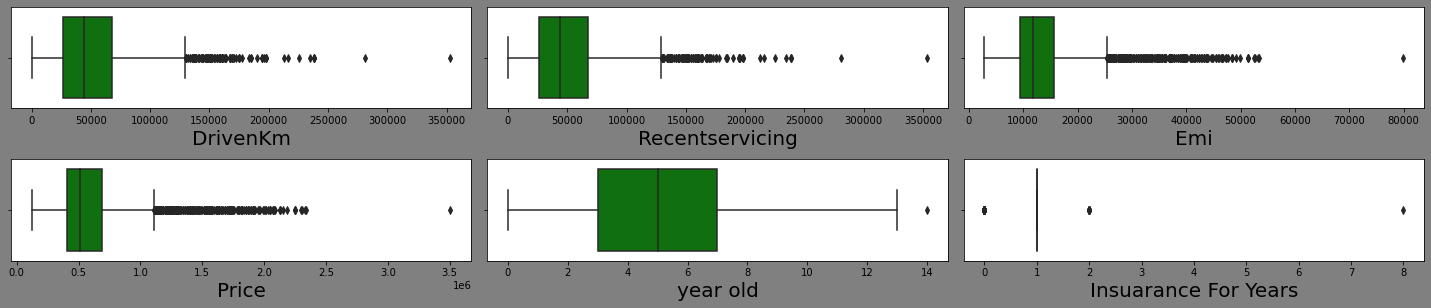

In [404]:
# Identifying the outliers using boxplot in train dataset

plt.figure(figsize=(20,25),facecolor='grey')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(12,3,plotnumber)
        sns.boxplot(df[column],color='green')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Removing outlier:

#### 1) zscore method

In [407]:
#Features having outliers in train dataset
features=df[['DrivenKm','Recentservicing','Emi','year old','Insuarance For Years']]

#Above we have created a list of columns with outliers in train dataset.

from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()


Location                     Name                Varient     Owners  \
0    DELHI        2012 Maruti Swift             ZXI Manual  1st Owner   
1    DELHI     2014 Maruti Alto K10             VXI Manual  1st Owner   
2    DELHI   2015 Hyundai Grand i10  MAGNA 1.1 CRDI Manual  2nd Owner   
3    DELHI  2014 Maruti Swift Dzire       VDI BS IV Manual  1st Owner   
4    DELHI        2015 Maruti Swift         VDI ABS Manual  1st Owner   

   DrivenKm    Fule  Recentservicing Transmission       InsuType   Emi  \
0     70990  Petrol            70990       MANUAL    Third Party  9400   
1     40562  Petrol            40562       MANUAL  Comprehensive  6670   
2     62491  Diesel            62491       MANUAL    Third Party  7239   
3     96978  Diesel            96978       MANUAL    Third Party  9610   
4     44638  Diesel            44638       MANUAL    Third Party  9976   

    Price  year old  Insuarance For Years  
0  407199         9                     1  
1  287299         7                     0  
2  312299         6                     1  
3  416399         7                     1  
4  432499         6                     1

In [408]:
#Checking shape of new and orignal train dataset
print("New",df_new.shape, "Orignal" ,df.shape)

New (4722, 13) Orignal (4966, 13)


In [423]:
#Checking dataloss in zscore method of train dataset
Dataloss = (((4966-4722)/4966)*100)
Dataloss

4.913411196133709

#### 2 IQR Method

In [410]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [411]:
#Checking shape of new and orignal train dataset
print("New",df_1.shape,"Orignal"  ,df.shape)

New (3390, 13) Orignal (4966, 13)


In [424]:
#Checking dataloss in IQR method of train dataset
Dataloss = (((4966-3390)/4966)*100)
Dataloss

31.735803463552152

In [425]:
df=df_new

In [427]:
df.shape

(4722, 13)

In [433]:
df_new.skew()

DrivenKm                0.738860
Recentservicing         0.738860
Emi                     0.009462
Price                   1.349734
year old                0.186773
Insuarance For Years   -0.092573
dtype: float64

### Removing skewness using yeo-johnson method for train dataset:

In [430]:
#Creating a list of skewed features in train dataset
fea=['Emi','Insuarance For Years']

#Taking a list as fea with all the columns with skewness in train dataset.

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [431]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)

In [434]:
#Checking skewness again in train dataset
df_new[fea].skew()

Emi                     0.009462
Insuarance For Years   -0.092573
dtype: float64

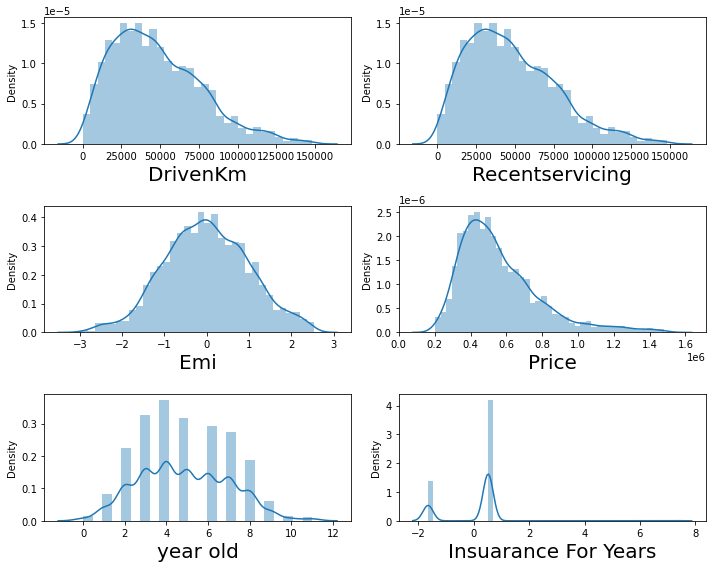

In [435]:
#Distribution plot for all numerical columns
plt.figure(figsize = (10,8))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=7:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

## Label Encoder

In [436]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[categorical_columns]= df_new[categorical_columns].apply(LE.fit_transform)

In [437]:
df_new

Location  Name  Varient  Owners  DrivenKm  Fule  Recentservicing  \
0            3    36      516       0     70990     1            70990   
1            3   104      440       0     40562     1            40562   
2            3   133      291       1     62491     0            62491   
3            3   110      413       0     96978     0            96978   
4            3   151      411       0     44638     0            44638   
5            3   331      440       0     10395     1            10395   
6            3    74      414       0    114506     0           114506   
7            3    67      367       0     64361     0            64361   
8            3   151      411       0     89196     0            89196   
9            3   109      440       0    107206     1           107206   
10           3    10      300       0     29273     1            29273   
12           3   109      414       0    112073     0           112073   
13           3   131      298       0     59041     0            59041   
14           3    82      147       0     76953     0            76953   
15           3   374      287       2     10477     1            10477   
16           3    89       35       0     31538     1            31538   
17           3   270      408       0     37695     1            37695   
18           3   222      352       0     35134     1            35134   
19           3   106      416       0     93428     0            93428   
20           3   297      414       0    112703     0           112703   
21           3   321      359       0      5503     1             5503   
22           3   177      296       0     48823     1            48823   
23           3   190      212       0     36520     1            36520   
24           3    56       89       2     87890     1            87890   
25           3    95      330       0     53444     0            53444   
27           3    64      330       1     47959     0            47959   
28           3   219       65       0     77578     0            77578   
29           3   185      342       0     51588     0            51588   
30           3   211       88       0     40536     1            40536   
31           3   264      103       0     35747     0            35747   
32           3   138       69       0     82705     0            82705   
33           3   113      469       0     43866     0            43866   
34           3   287      212       0     25937     1            25937   
36           3   118      143       0     82096     0            82096   
37           3   131      364       0     70052     1            70052   
38           3    54      458       1     69697     0            69697   
39           3    68      286       0     76604     0            76604   
40           3    98      327       0     66526     0            66526   
41           3   264       79       1     16826     0            16826   
43           3   228      341       1     44533     0            44533   
47           3   136      380       0     24525     1            24525   
49           3   229      391       0     37328     0            37328   
50           3   259      401       0     85295     0            85295   
51           3   185      338       0     55537     0            55537   
53           3   331      440       0      6999     1             6999   
54           3   195      169       0    117629     0           117629   
55           3   343      412       0     56076     0            56076   
56           3   194      490       1     27611     0            27611   
57           3   185      339       0     46876     0            46876   
58           3   218       60       0     15243     1            15243   
60           3   339      287       0      1991     1             1991   
62           3   289      517       0     46829     1            46829   
63           3   319      193       0      5906     1             5906   
64        

In [438]:
#Correlation of train dataset
cor=df_new.corr()
cor

Location      Name   Varient    Owners  DrivenKm  \
Location              1.000000 -0.127801  0.003793 -0.031611  0.039847   
Name                 -0.127801  1.000000  0.029615 -0.145878 -0.493151   
Varient               0.003793  0.029615  1.000000 -0.025719  0.008073   
Owners               -0.031611 -0.145878 -0.025719  1.000000  0.049688   
DrivenKm              0.039847 -0.493151  0.008073  0.049688  1.000000   
Fule                 -0.125603  0.217164 -0.032059  0.036017 -0.480687   
Recentservicing       0.039847 -0.493151  0.008073  0.049688  1.000000   
Transmission         -0.045298 -0.116232  0.031603 -0.054427  0.093823   
InsuType             -0.045376  0.136642  0.029053 -0.021709  0.004338   
Emi                   0.056563  0.425069 -0.170101 -0.066854 -0.045671   
Price                 0.070565  0.373711 -0.165427 -0.062236 -0.032850   
year old              0.127355 -0.988852  0.028136  0.145139  0.496429   
Insuarance For Years  0.032475 -0.051825  0.042607 -0.015499  0.130233   

                          Fule  Recentservicing  Transmission  InsuType  \
Location             -0.125603         0.039847     -0.045298 -0.045376   
Name                  0.217164        -0.493151     -0.116232  0.136642   
Varient              -0.032059         0.008073      0.031603  0.029053   
Owners                0.036017         0.049688     -0.054427 -0.021709   
DrivenKm             -0.480687         1.000000      0.093823  0.004338   
Fule                  1.000000        -0.480687     -0.101061 -0.011289   
Recentservicing      -0.480687         1.000000      0.093823  0.004338   
Transmission         -0.101061         0.093823      1.000000  0.016118   
InsuType             -0.011289         0.004338      0.016118  1.000000   
Emi                  -0.249255        -0.045671     -0.227639  0.085128   
Price                -0.258440        -0.032850     -0.267571  0.086347   
year old             -0.221104         0.496429      0.113273 -0.131194   
Insuarance For Years -0.083609         0.130233      0.014507  0.284831   

                           Emi     Price  year old  Insuarance For Years  
Location              0.056563  0.070565  0.127355              0.032475  
Name                  0.425069  0.373711 -0.988852             -0.051825  
Varient              -0.170101 -0.165427  0.028136              0.042607  
Owners               -0.066854 -0.062236  0.145139             -0.015499  
DrivenKm             -0.045671 -0.032850  0.496429              0.130233  
Fule                 -0.249255 -0.258440 -0.221104             -0.083609  
Recentservicing      -0.045671 -0.032850  0.496429              0.130233  
Transmission         -0.227639 -0.267571  0.113273              0.014507  
InsuType              0.085128  0.086347 -0.131194              0.284831  
Emi                   1.000000  0.949328 -0.448826             -0.002948  
Price                 0.949328  1.000000 -0.389504              0.010259  
year old             -0.448826 -0.389504  1.000000              0.055163  
Insuarance For Years -0.002948  0.010259  0.055163              1.000000

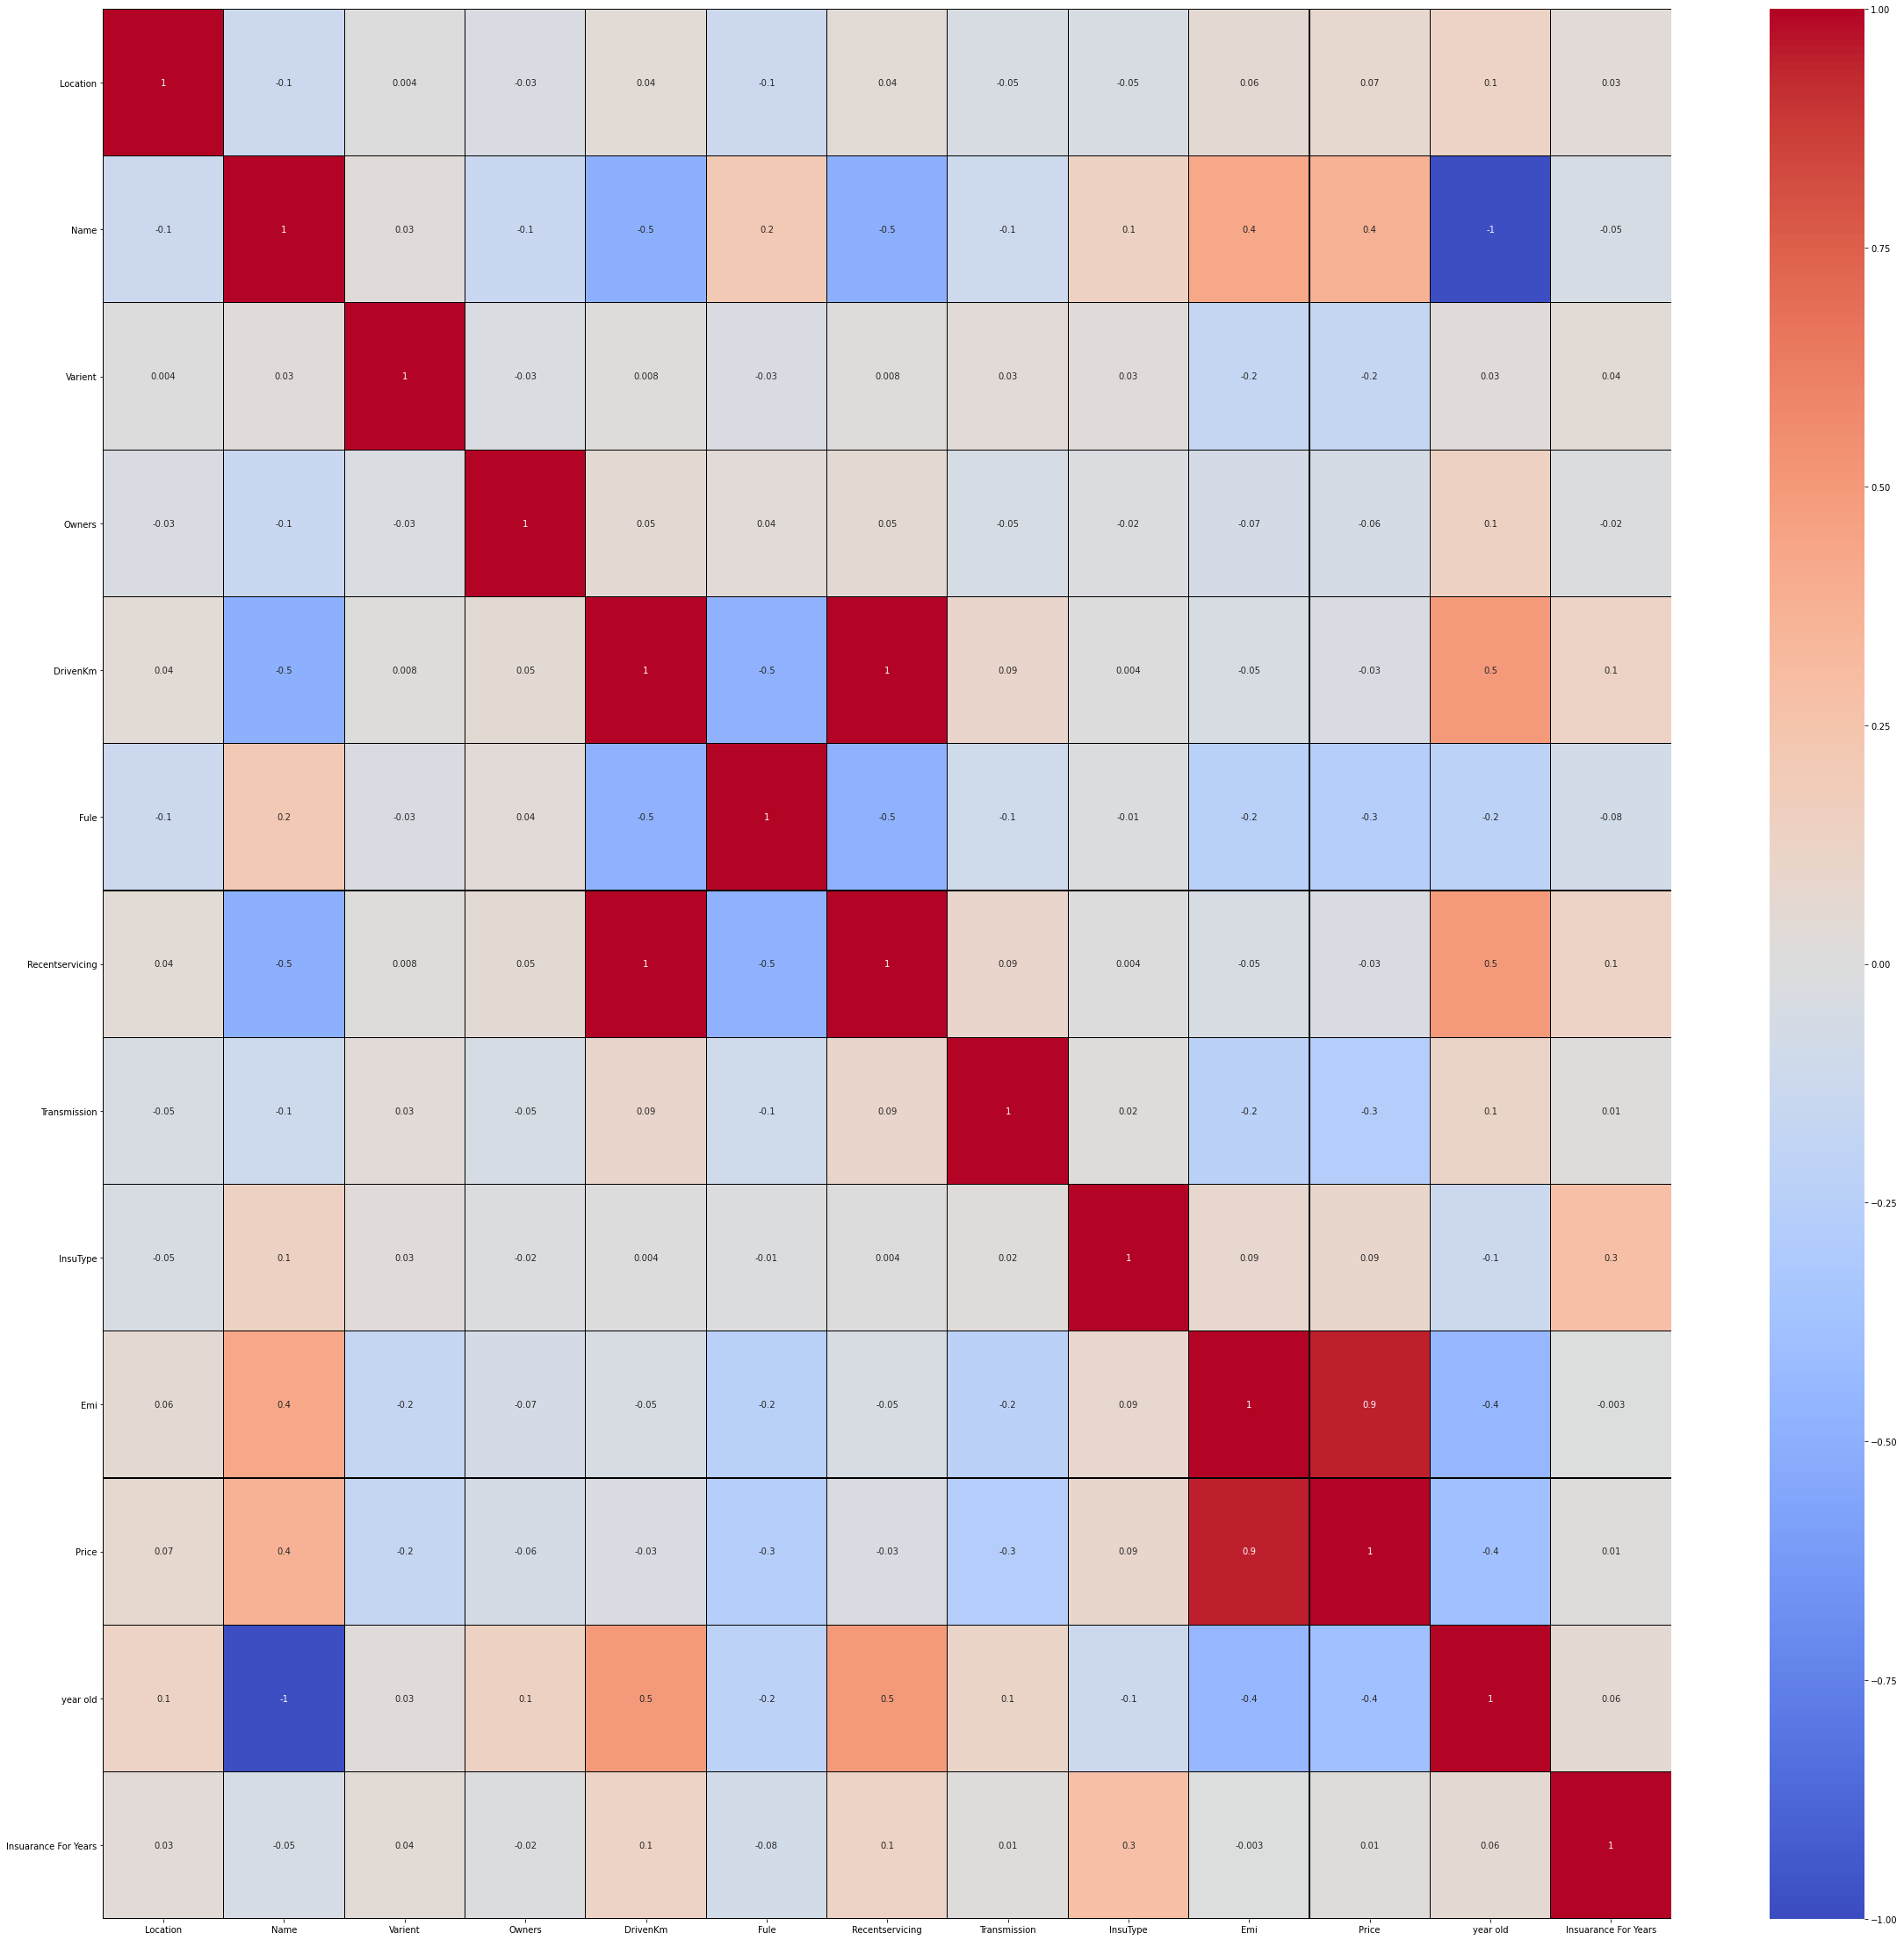

In [439]:
# Visualizing the correlation matrix by plotting heat map for train dataset.
plt.figure(figsize=(40,40))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

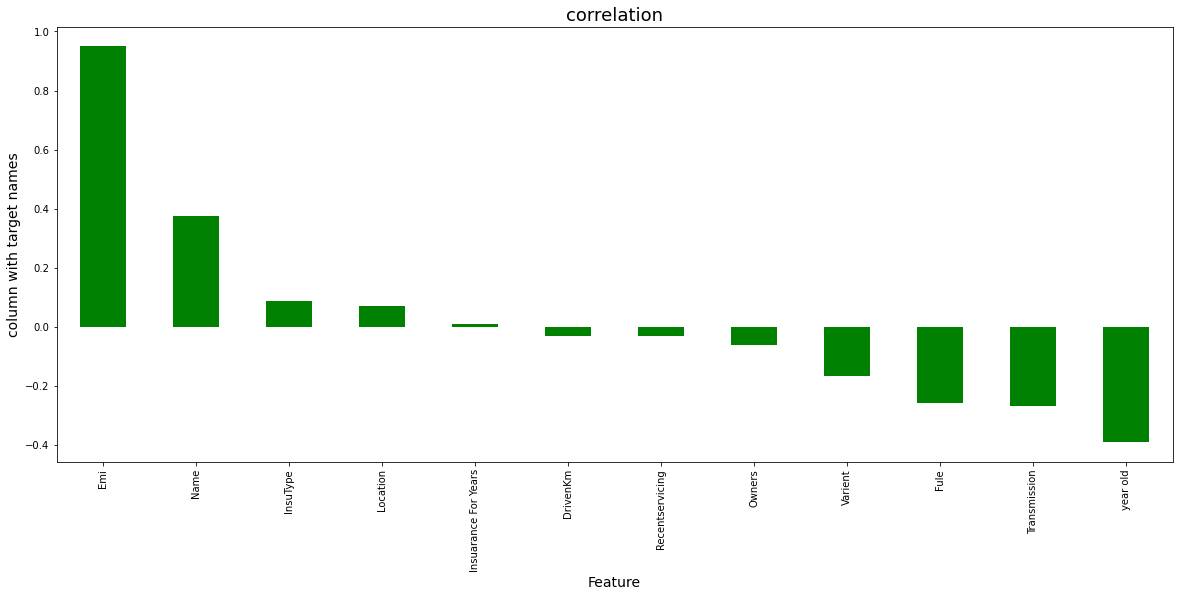

In [440]:
plt.figure(figsize=(20,8))
df_new.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

## Model Building

In [441]:

# Seperating features and labl
x = df.drop("Price",axis=1)
y = df["Price"]

In [442]:
#Scaling the train data using standard scaler:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [443]:
X.head()

Location      Name   Varient    Owners  DrivenKm      Fule  \
0 -0.523433 -1.730678  1.448166 -0.500401  0.796578  0.753478   
1 -0.523433 -1.008910  0.920877 -0.500401 -0.259416  0.753478   
2 -0.523433 -0.701097 -0.112888  1.552503  0.501623 -1.327179   
3 -0.523433 -0.945225  0.733551 -0.500401  1.698484 -1.327179   
4 -0.523433 -0.510041  0.719675 -0.500401 -0.117960 -1.327179   

   Recentservicing  Transmission  InsuType       Emi  year old  \
0         0.796578      0.370887  0.204135 -0.654173  1.908298   
1        -0.259416      0.370887 -1.937921 -1.740014  0.985987   
2         0.501623      0.370887  0.204135 -1.469989  0.524831   
3         1.698484      0.370887  0.204135 -0.588251  0.985987   
4        -0.117960      0.370887  0.204135 -0.477785  0.524831   

   Insuarance For Years  
0              0.519712  
1             -1.650966  
2              0.519712  
3              0.519712  
4              0.519712

In [444]:
X.shape

(4722, 12)

In [445]:
#Checking for multicolinearity issue in train dataset using VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features              Features
0       1.051566              Location
1      53.766964                  Name
2       1.208765               Varient
3       1.035006                Owners
4            inf              DrivenKm
5       1.546585                  Fule
6            inf       Recentservicing
7       1.103243          Transmission
8       1.123057              InsuType
9       1.700999                   Emi
10     55.346110              year old
11      1.113659  Insuarance For Years

In [446]:
#Droping high VIF columns
X = X.drop(["year old"],axis=1)

In [447]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features              Features
0       1.051076              Location
1       1.864949                  Name
2       1.065564               Varient
3       1.034697                Owners
4            inf              DrivenKm
5       1.537372                  Fule
6            inf       Recentservicing
7       1.096811          Transmission
8       1.122600              InsuType
9       1.637236                   Emi
10      1.113639  Insuarance For Years

In [448]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.999994486739044  on Random_state  8


In [449]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

## Importing Regressive algorithm

In [450]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

#### 1)RandomForestRegressor

In [452]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 99.99939529178053
mean_squared_error: 300712.8588567396
mean_absolute_error: 227.37685250529287
root_mean_squared_error: 548.3729195143936

Cross validation score : 99.99847621728804

R2_Score - Cross Validation Score : 0.0009190744924865157


#### 2) XGBRegressor

In [454]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 99.99636776598855
mean_squared_error: 1806258.6855069029
mean_absolute_error: 746.6975344036697
root_mean_squared_error: 1343.9712368599646

Cross validation score : 99.99507167985598

R2_Score - Cross Validation Score : 0.001296086132569485


#### 3) ExtraTreesRegressor

In [455]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(ETR, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 99.99893587679534
mean_squared_error: 529173.4438955539
mean_absolute_error: 244.87226534932958
root_mean_squared_error: 727.4430863617813

Cross validation score : 99.99339816635819

R2_Score - Cross Validation Score : 0.0055377104371530095


#### 4) GradientBoosting"

In [457]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 99.99132260865663
mean_squared_error: 4315144.187320909
mean_absolute_error: 1520.7671973002384
root_mean_squared_error: 2077.2925136631357

Cross validation score : 99.99086535013998

R2_Score - Cross Validation Score : 0.0004572585166471299


#### 5) DecisionTreeRegressor

In [458]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 99.99787335372329
mean_squared_error: 1057551.1644318984
mean_absolute_error: 317.2194777699365
root_mean_squared_error: 1028.373066757341

Cross validation score : 99.99553846522936

R2_Score - Cross Validation Score : 0.0023348884939338177


In [ ]:
saving best model i.e GradientBoostingRegressor

## Saving the model

In [460]:
# Saving the model using .pkl
import joblib
joblib.dump(GBR,"Car_Price.pkl")

['Car_Price.pkl']

## Predicting House Price for test dataset using Saved model of train dataset:

In [461]:
# Loading the saved model
model=joblib.load("Car_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([385908.8432148 , 670562.1762851 , 448628.13382881, ...,
       671940.50505052, 597310.99888959, 483100.55268333])

In [462]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0              1              2              3     \
Predicted  385908.843215  670562.176285  448628.133829  531318.387475   
Actual     389199.000000  668099.000000  447599.000000  531199.000000   

                    4             5              6             7     \
Predicted  501090.665901  1.383096e+06  297662.069703  1.157215e+06   
Actual     500899.000000  1.385799e+06  295399.000000  1.162899e+06   

                    8              9              10             11    \
Predicted  940531.647351  659098.020775  692002.145905  653410.841455   
Actual     945499.000000  655999.000000  691499.000000  650699.000000   

                    12             13             14             15    \
Predicted  368578.228379  434095.832449  561484.917709  385161.764265   
Actual     369799.000000  432499.000000  561999.000000  382599.000000   

                   16            17             18             19    \
Predicted  1.186752e+06  315003.33344  316235.548312  454396.812786   
Actual     1.200999e+06  314399.00000  316199.000000  454299.000000   

                    20             21             22             23    \
Predicted  385161.764265  434177.633064  385161.764265  756476.904753   
Actual     383399.000000  432199.000000  382499.000000  756299.000000   

                    24             25            26             27    \
Predicted  616206.262957  231501.433349  628938.81713  528026.976574   
Actual     615699.000000  231599.000000  626799.00000  529399.000000   

                    28             29             30             31    \
Predicted  454761.695829  223311.149712  686699.930972  440368.270032   
Actual     458599.000000  222699.000000  683999.000000  440599.000000   

                    32             33             34            35    \
Predicted  730393.338303  258558.407113  542162.508998  1.257471e+06   
Actual     729799.000000  259399.000000  542799.000000  1.252999e+06   

                    36             37            38            39    \
Predicted  385370.472622  709422.270118  710320.50842  1.050301e+06   
Actual     387999.000000  709599.000000  711899.00000  1.046799e+06   

                    40             41             42             43    \
Predicted  347440.502896  577833.785186  427209.508401  282773.034558   
Actual     346299.000000  576199.000000  429999.000000  282599.000000   

                   44             45            46             47    \
Predicted  331424.32194  816067.506635  1.013345e+06  481614.756047   
Actual     330499.00000  815499.000000  1.014999e+06  479799.000000   

                   48             49            50             51    \
Predicted  1.108432e+06  463785.391078  1.376681e+06  618508.420745   
Actual     1.108299e+06  463599.000000  1.376199e+06  620499.000000   

                    52             53            54             55    \
Predicted  687201.271516  891884.557202  338953.54465  598857.323165   
Actual     687499.000000  890399.000000  341699.00000  598899.000000   

                    56             57             58             59    \
Predicted  856442.038471  258601.277162  283097.341017  653611.999779   
Actual     852299.000000  259499.000000  282799.000000  655499.000000   

                    60             61            62             63    \
Predicted  780604.285256  643447.459766  1.179220e+06  440226.692912   
Actual     783899.000000  643699.000000  1.177199e+06  441599.000000   

                    64            65             66             67    \
Predicted  450606.350353  366268.85704  394799.487464  733271.059676   
Actual     450199.000000  363799.00000  396499.000000  733999.000000   

                    68             69             70             71    \
Predicted  692249.440945  310020.469611  347100.704212  377370.482634   
Actual     693499.000000  308299.000000  344599.000000  380299.000000   

                    72            73             74             75    \
Predicted  467517.404198  561034.

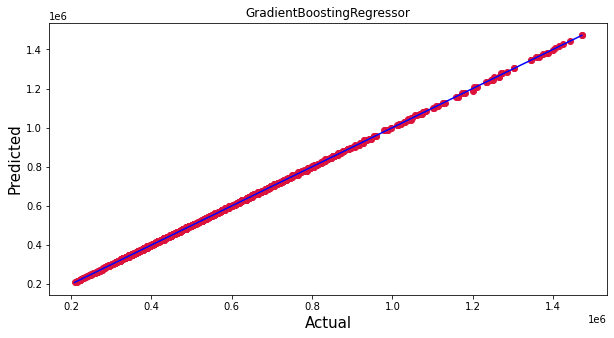

In [463]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("GradientBoostingRegressor")
plt.show()